<img src="Resources/Heading.jpg">

## Simple Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. [(Reference)](https://en.wikipedia.org/wiki/Linear_regression#:~:text=In%20statistics%2C%20linear%20regression%20is,is%20called%20simple%20linear%20regression.)

## Task
Prediction of Marks of a student based on the number of Study Hours.


In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.linear_model import LinearRegression  

%matplotlib inline

In [2]:
# Reading CSV File
df = pd.read_csv("Student_scores.csv")

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Histogram Plot

A histogram is a graphical representation that organizes a group of data points into user-specified ranges. It is similar in appearance to a bar graph. The histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins. [(Reference)](https://www.investopedia.com/terms/h/histogram.asp)

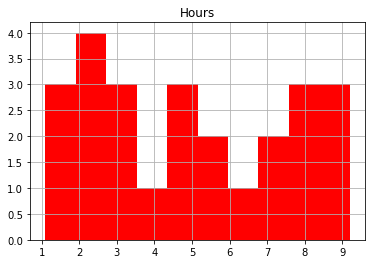

In [6]:
# Histogram of Hours Column
plt.hist(df["Hours"], color = "r")
plt.grid()
plt.title("Hours")
plt.show()

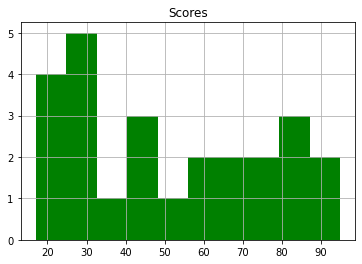

In [7]:
# Histogram of Scores Column
plt.hist(df["Scores"], color = "g")
plt.grid()
plt.title("Scores")
plt.show()

## Correlation 

Correlation is used to test relationships between quantitative variables or categorical variables. [(Reference)](https://www.statisticshowto.com/probability-and-statistics/correlation-analysis/)

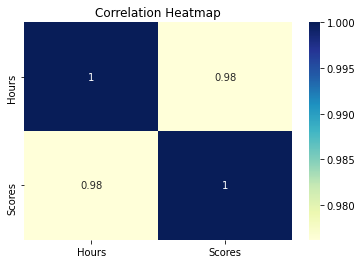

In [8]:
# Correlation Heatmap of our Data
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap")
plt.show()

### We can conclude that there is a Positive Correlation between the "Hours" and the "Scores" column.

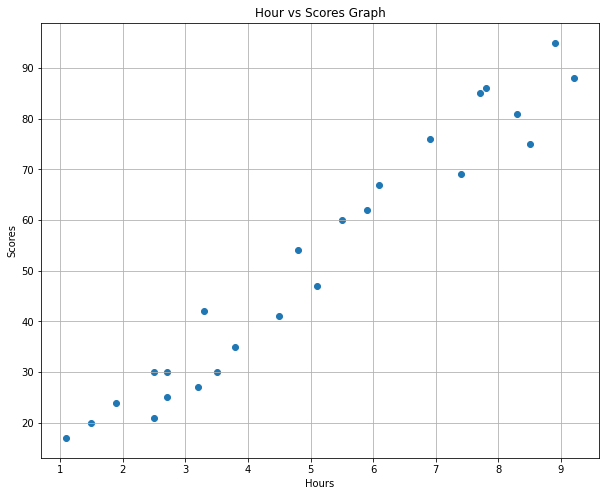

In [9]:
# Scatter Plot of the Data
plt.figure(figsize = (10,8))
plt.scatter(df["Hours"], df["Scores"])
plt.grid()
plt.title("Hour vs Scores Graph")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

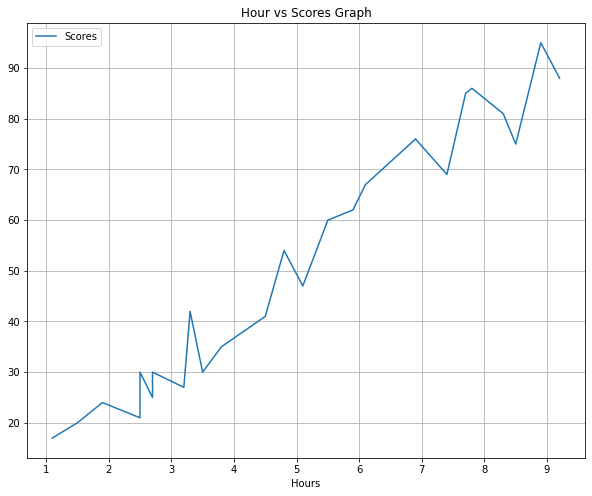

In [10]:
# Line plot of the Data.
df2 = df.sort_values(['Hours', 'Scores'])
df2.plot(x = "Hours", y = "Scores", figsize = (10,8), grid = True)
plt.title("Hour vs Scores Graph")
plt.show()

### From the Graph we can Conclude that there is a Positive linear Relation between "Hours" and "Scores"

## Preparing the data for Linear Regression

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:,0].values.reshape(-1,1)
y = df.iloc[:,1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


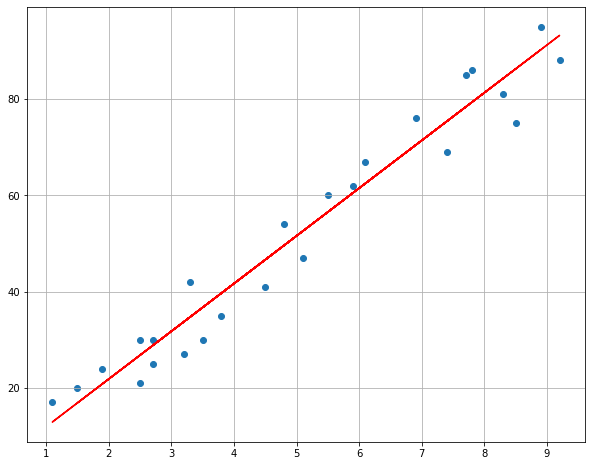

In [14]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.figure(figsize = (10,8))
plt.scatter(X, y)
plt.plot(X, line, color = "r")
plt.grid()
plt.show()

## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Prediction Task

In [18]:
hours = 9.25
out = regressor.predict([[hours]])
print("Given No of Hours = {}".format(hours))
print("Score Predicted = {}".format(out[0]))

Given No of Hours = 9.25
Score Predicted = 93.69173248737535


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# End of Task 1